In [ ]:
#import the necessary libraries for this project
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import preprocessing
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [ ]:
#import the dataset from kaggle to google colab using kaggle.json file
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json 

#download the dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

#unzip the dataset file
!unzip -q /content/gtsrb-german-traffic-sign.zip -d Data

Saving kaggle.json to kaggle.json
 99% 604M/612M [00:02<00:00, 239MB/s]
100% 612M/612M [00:02<00:00, 246MB/s]


In [ ]:
# Setting the variables for data, labels and categories for furthur use
data = []
labels = []
categories = 43

In [ ]:
# Retrieving the images and its labels
for i in range(categories):
    path = os.path.join('/content/Data/','Train',str(i))
    images = os.listdir(path)
    for a in images:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)

In [ ]:
# Converting the lists (data and labels from above) into numpy arrays (features and labels)
features = np.array(data)
labels = np.array(labels)

In [ ]:
# printing the shape of all features and labels
print(features.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


In [ ]:
# Splitting the dataset as training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state=123)

In [ ]:
# printing the shape of all training and testing datasets after the split
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31367, 30, 30, 3) (31367,)
(7842, 30, 30, 3) (7842,)


In [ ]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
# Building the model
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(5,5), 
                 activation='relu', 
                 input_shape=X_train.shape[1:]))

model.add(Conv2D(filters=64, 
                 kernel_size=(5,5), 
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))

model.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(64, activation='softmax'))

In [ ]:
# Compiling of the CNN model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
# displaying the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

In [ ]:
#Setting the bacth size and the epochs
EPOCHS = 15
BATCH_SIZE=64

# Training the Model
history = model.fit(X_train, 
                    y_train, 
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 144s 294ms/step - loss: 0.9882 - accuracy: 0.7248 - val_loss: 0.3350 - val_accuracy: 0.9249
Epoch 2/15
491/491 [==============================] - 132s 268ms/step - loss: 0.6105 - accuracy: 0.8247 - val_loss: 0.1912 - val_accuracy: 0.9504
Epoch 3/15
491/491 [==============================] - 131s 267ms/step - loss: 0.4657 - accuracy: 0.8659 - val_loss: 0.1597 - val_accuracy: 0.9514
Epoch 4/15
491/491 [==============================] - 132s 268ms/step - loss: 0.3636 - accuracy: 0.8917 - val_loss: 0.1531 - val_accuracy: 0.9605
Epoch 5/15
491/491 [==============================] - 134s 274ms/step - loss: 0.3282 - accuracy: 0.9042 - val_loss: 0.0984 - val_accuracy: 0.9735
Epoch 6/15
491/491 [==============================] - 133s 271ms/step - loss: 0.2671 - accuracy: 0.9214 - val_loss: 0.0713 - val_accuracy: 0.9814
Epoch 7/15
491/491 [==============================] - 130s 266ms/step - loss: 0.2427 - accuracy: 0.9298 - val_loss: 0.0798 -

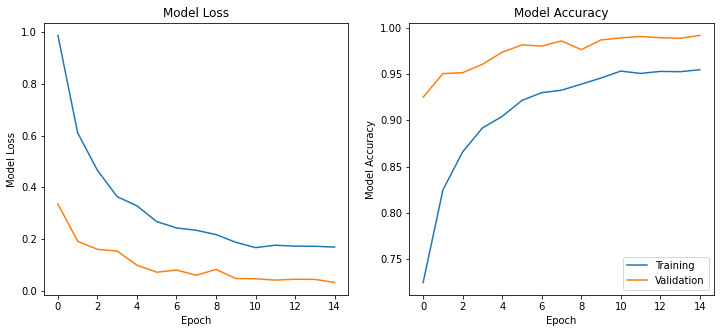

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(history.history['loss'],label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_ylabel('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].title.set_text('Model Loss')
ax[1].plot(history.history['accuracy'], label='Training')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_ylabel('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].title.set_text('Model Accuracy')
plt.legend()

In [ ]:
# Importing the test dataset
y_test = pd.read_csv('/content/Data/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

# Retreiving the images
for img in imgs:
    image = Image.open('/content/Data/'+img)
    image = image.resize([30, 30])
    data.append(np.array(image))

X_test=np.array(data)

prediction = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
print(accuracy_score(labels, prediction))

0.9577197149643706


In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/CNN_model')